In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer(as_frame=True)

X, y = data.data, data.target

p_male = .4
np.random.seed(42)
gender = np.random.binomial(1, p_male, X.shape[0]).astype(bool)

In [2]:
np.unique(y[gender], return_counts=True)

(array([0, 1]), array([ 84, 157]))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

print(clf.score(X_train, y_train))

y_pred_train = clf.predict(X_train)

clf.score(X_test, y_test)

1.0


0.9532163742690059

In [5]:
y[gender].value_counts()

1    157
0     84
Name: target, dtype: int64

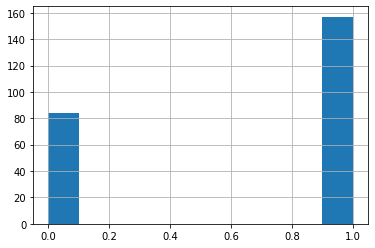

In [6]:
y[gender].hist();

In [7]:
l, cnts = np.unique(y[gender], return_counts=True)

In [8]:
np.sum(cnts)

241

In [9]:
#from scipy.stats import binomtest

# perform the binomial test
#p_value = binomtest(s1,  np.sum(cnts), p2)

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import (chi2_contingency, chi2)

def cramers_v(row_variable : np.array, column_variable: np.array, siglev : float = 0.05)-> dict:
     """
     Calculate Cramer's V based on contingency row_variable (e.g. predicted labels) and column_variable (e.g. ground truth labels). 
     """
     n = len(row_variable)
     # Create contingency table:
     contingency = pd.crosstab(row_variable, column_variable, margins = False)
     X2 = chi2_contingency(contingency, correction=True)[0]       # Chi2 test statistic with yates's correction for cont. approx.
     minDim = min(contingency.shape[0]-1,contingency.shape[1]-1)
     dof = (contingency.shape[0]-1)*(contingency.shape[1]-1)      
     crit_val = chi2.ppf(1-siglev, dof)                        # critical value
     # Calculate Cramer's V association measure:
     cramers_v = np.sqrt((X2/n) / minDim)          # [0,1]
     return {'CramersV' : np.round(cramers_v,5), 'Contingency': contingency, 'Statistic': X2, 'Critical': crit_val}   # right-sided alternative!


In [13]:
result = cramers_v(row_variable = y_pred_train, column_variable = y_train)
result

{'CramersV': 0.99462,
 'Contingency': target    0    1
 row_0           
 0       148    0
 1         0  250,
 'Statistic': 393.73032373849526,
 'Critical': 3.841458820694124}

In [237]:
result['CramersV']

0.99462

In [233]:
contingency = pd.crosstab(y_pred_train, y_train, margins = True)
contingency

target,0,1,All
row_0,,,
0,148,0,148
1,0,250,250
All,148,250,398


In [219]:
contingency.columns

Index([0, 1, 'All'], dtype='object', name='target')

In [223]:
cont = contingency.values
cont

array([[148,   0, 148],
       [  0, 250, 250],
       [148, 250, 398]])

In [ ]:
cond_target